In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
url='https://raw.githubusercontent.com/gabminamedez/spotify-data/refs/heads/master/data.csv'
df=pd.read_csv(url)
df.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0


In [3]:
correlation=df.select_dtypes(include='number').corr()

Text(0.5, 1.0, 'Correlation Matrix for Numeric Features')

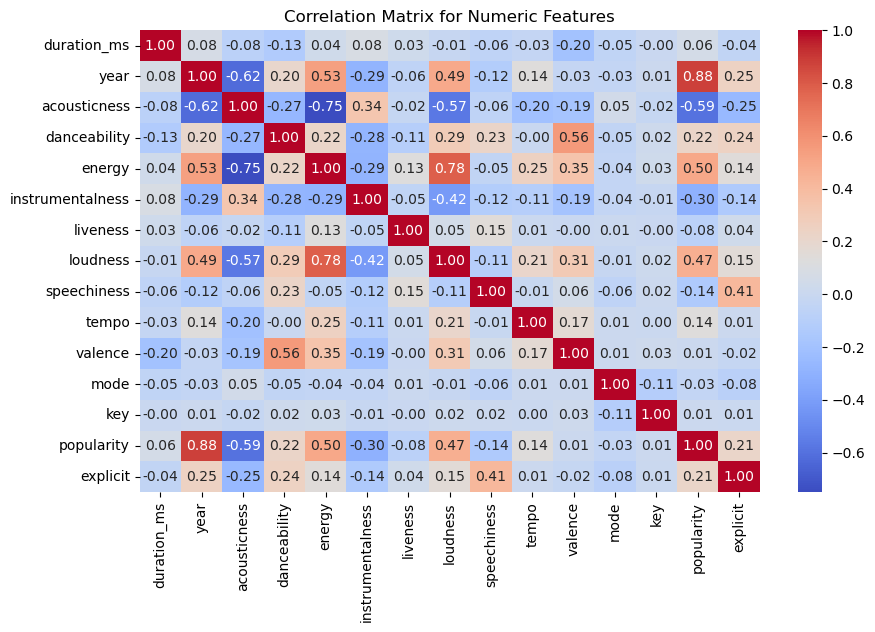

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numeric Features")

In [5]:
strongly_correlated=correlation['popularity'].sort_values(ascending=False)

In [6]:
print('\nTop correlations with popularity:')
strongly_correlated


Top correlations with popularity:


popularity          1.000000
year                0.880724
energy              0.497488
loudness            0.466546
danceability        0.221077
explicit            0.214044
tempo               0.135047
duration_ms         0.063292
key                 0.010675
valence             0.009327
mode               -0.032854
liveness           -0.075293
speechiness        -0.135707
instrumentalness   -0.299829
acousticness       -0.593345
Name: popularity, dtype: float64

In [7]:
#Outlier Detection
def detect_outliers(x):
    Q1=x.quantile(0.25)
    Q3=x.quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-(1.5*IQR)
    upper=Q3+(1.5*IQR)
    outliers=x[(x<lower) | (x>upper)]
    return outliers

In [8]:
for col in ['duration_ms','popularity']:
    outlier=detect_outliers(df[col])
    print(f"\n{col}: {outlier.count()} outliers detected")


duration_ms: 9483 outliers detected

popularity: 0 outliers detected


In [9]:
def categorize_energy(e):
    if e>0.7:
        return 'High'
    elif e>=0.4:
        return "Medium"
    else:
        return "Low"
df['EnergyLevel']=df['energy'].apply(categorize_energy)

In [10]:
avg_popularity=df.groupby('EnergyLevel')['popularity'].mean()

In [11]:
avg_popularity

EnergyLevel
High      43.828149
Low       19.057684
Medium    37.319430
Name: popularity, dtype: float64

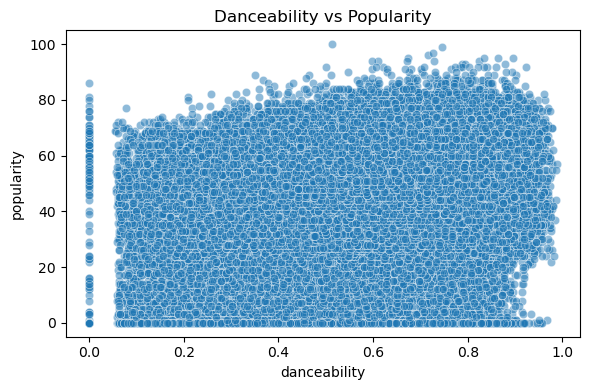

In [12]:
#relationship between energy/danceability and popularity
plt.figure(figsize=(6,4))
sns.scatterplot(x='danceability', y='popularity', data=df, alpha=0.5)
plt.title("Danceability vs Popularity")
plt.tight_layout()

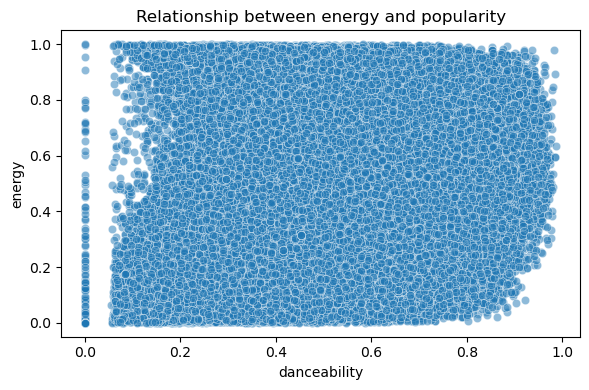

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='danceability',y='energy',data=df,alpha=0.5)
plt.title("Relationship between energy and popularity")
plt.tight_layout()

In [14]:
#Artist & Genre Insights
highest_avg_popularity=df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 artists by average popularity:")
print(highest_avg_popularity)


Top 10 artists by average popularity:
artists
['Powfu', 'beabadoobee']                         97.0
['BENEE', 'Gus Dapperton']                       95.0
['Surf Mesa', 'Emilee']                          95.0
['StaySolidRocky']                               94.0
['Ariana Grande', 'Justin Bieber']               94.0
['Topic', 'A7S']                                 92.0
['Bad Bunny', 'Jowell & Randy', 'Nengo Flow']    92.0
['KAROL G', 'Nicki Minaj']                       92.0
['Marshmello', 'Halsey']                         91.0
['Lady Gaga', 'Ariana Grande']                   90.5
Name: popularity, dtype: float64


In [15]:
if 'genre' in df.columns:
    highest_avg_danceability=df.groupby('genre')['danceability'].mean().sort_values(ascending=False).head(10)
    print("\nTop 10 genres by average danceability:")
    print(highest_avg_danceability)
else:
    print("\nNo 'genre' column found in datasett")


No 'genre' column found in datasett


In [16]:
print("\n----- Summary Insights -----")
print("""
1. The correlation matrix shows which musical features influence popularity the most.
2. Outliers detected in duration and popularity can affect trend analysis.
3. High-energy songs tend to have slightly higher average popularity.
4. Danceability also shows a moderate positive relation with popularity.
5. Some artists consistently maintain high popularity across their tracks.
6. This EDA reveals how musical features contribute to audience engagement.
""")


----- Summary Insights -----

1. The correlation matrix shows which musical features influence popularity the most.
2. Outliers detected in duration and popularity can affect trend analysis.
3. High-energy songs tend to have slightly higher average popularity.
4. Danceability also shows a moderate positive relation with popularity.
5. Some artists consistently maintain high popularity across their tracks.
6. This EDA reveals how musical features contribute to audience engagement.

